# Overview

**One must strike a balance between *exploring* each of the levers in order to determine their value, while *exploiting* one’s current knowledge in order to favor high paying levers.**

**Traditional A-B testing can be thought of as a special case of the multi-armed bandit problem, in which we choose to pursue a strategy of pure exploration in the initial testing phase, followed by a period of pure exploitation in which we choose the most valuable “arm” 100% of the time. If the exploitation phase can be assumed to be much longer than the exploration phase, this approach is usually reasonable (though not optimal), as the wasted resources during the exploration are insignificant relative to the total rewards. However, in cases where the cost of the exploration phase is non-negligible, alternative approaches are needed.**

**Large gains can be made by using a multi-armed bandit approach in order to begin exploiting as early as possible.**

**When the phenomenon being tested changes significantly enough that the results of an A-B test can become invalid over time, multi-arm bandits provide an alternative to repeatedly retesting.**

# Epsilon-Greedy

**The most straightforward algorithm for continuously balancing exploration with exploitation is called “epsilon-greedy”. Here, we pull a randomly chosen arm a fraction $\epsilon$ of the time. The other $1-\epsilon$ of the time, we pull the arm which we estimate to be the most profitable. As each arm is pulled and rewards are received, we continuously re-evaluate which is the most profitable arm.**

**The following code implements a simple 10-Armed Bandit using the epsilon-greedy algorithm. The payout rate of the arms are normally distributed with mean=0 and sd=1. Gaussian noise is also added to the rewards, also with mean=0 and sd=1.**

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Bandit:
    def __init__(self):
        self.actual_values = np.random.normal(0,1,10) # actual values, epsilon, and number of arms (10) are constant
        self.num_pulls = np.zeros(10)
        self.avg_payouts = np.zeros(10)

    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.actual_values[action] + noise # reward is actual value of lever/arm, modulo noise
        return reward

    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if rand_num < epsilon:
          return np.random.randint(10) # returning the action
        else:
          return np.argmax(self.avg_payouts) # the arm whose average payout has been greatest
                                             # there can be a tie here

    def update_avg(self,action,reward):
        self.num_pulls[action] += 1
        alpha = 1 / self.num_pulls[action]
        self.avg_payouts[action] += alpha * (reward - self.avg_payouts[action]) # keeps running average of rewards
        
# never specified total number of pulls in experiment

In [16]:
def MAB(bandit,Npulls,epsilon):
    reward_history = [] # len(reward_history) = Npulls
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        reward = bandit.get_reward(action)
        bandit.update_avg(action,reward)
        reward_history.append(reward)
    return np.array(reward_history)

# Why is this function not in the class definition?

In [30]:
Nexp = 500
Npulls = 3000
# Running 200 experiments, each with 3,000 pulls, for each of three epsilon values
# Total of 600 experiments conducted
# Total of 1,800,000 pulls

agg_outcome_eps0p0 = np.zeros(Npulls)
agg_outcome_eps0p01 = np.zeros(Npulls)
agg_outcome_eps0p1 = np.zeros(Npulls)
# Recording aggregate outcomes for each pull, for each epsilon
# Each array is of length 3,000

for i in range(Nexp): 
   bandit = Bandit() 
   agg_outcome_eps0p0 += MAB(bandit,Npulls,0.0) 
   bandit = Bandit() 
   agg_outcome_eps0p01 += MAB(bandit,Npulls,0.01) 
   bandit = Bandit() 
   agg_outcome_eps0p1 += MAB(bandit,Npulls,0.1) 

avg_outcome_eps0p0 = agg_outcome_eps0p0 / Nexp 
avg_outcome_eps0p01 = agg_outcome_eps0p01 / Nexp
avg_outcome_eps0p1 = agg_outcome_eps0p1 / Nexp
# Now divide by 200 to obtain average outcomes

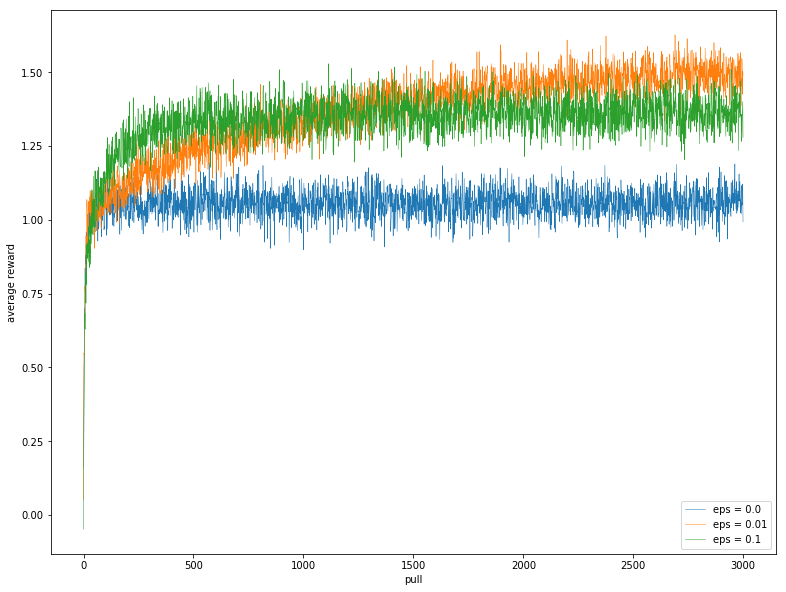

In [41]:
plt.figure(figsize=(13,10))

plt.plot(avg_outcome_eps0p0, label="eps = 0.0", linewidth=0.5)
plt.plot(avg_outcome_eps0p01, label="eps = 0.01", linewidth=0.5)
plt.plot(avg_outcome_eps0p1, label="eps = 0.1", linewidth=0.5)

plt.xlabel('pull')
plt.ylabel('average reward')

plt.legend(loc='lower right')
plt.show()

**We compare the evolution of average/expected reward vs iteration for three values of $\epsilon$. Choosing $\epsilon=0$ is equivalent to a purely greedy approach, in which we always choose the arm which is the most rewarding up to that point. In this case, the expected value very quickly increases, as we commit to one arm and stop exploring, but the expected value is relatively low as we don't attempt to search for better options. Choosing $\epsilon=0.1$ leads to higher expected rewards than $\epsilon=0$, but it takes approximately 500 iterations before leveling off due to exploration. Choosing $\epsilon=0.01$ leads to the highest expected reward in the long term, but it takes thousands of iterations to reach this level.**

# Bayesian Bandits - Randomized Probability Matching

1. Assume a “prior” probability distribution for the expected payout of each arm in the bandit.
2. Use these distributions to compute the probability that each arm is the best arm.
3. Choose which arm to pull next. The probability of a given arm being chosen is equal to the probability that it is the best arm.
4. Measure the reward received and update our “posterior” probability distribution for the expected payout of each arm.
5. Iterate steps 2 - 4

**The multi-armed bandit problem can be thought of as a special case of the more general Reinforcement Learning problem.**

**Source for this notebook: https://blog.thedataincubator.com/2016/07/multi-armed-bandits-2/**

**See also: https://en.wikipedia.org/wiki/Thompson_sampling**

**See also: https://en.wikipedia.org/wiki/Regret_(decision_theory)**